### Build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct ## concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

## CRISP-DM PHASE 1:  BUSINESS UNDERSTANDING 

#### The Business Background: The Portuguese Bank used their own contact center to reach out directly via telephone to various clients. Even though there were two options to use (Nominal Values and Amount Invested) the bank chose to use the Nominal attribute with values enumerated for three groups; however, the bank felt it needed to use it's internal database to gain more insight on their client's characteristics.  ** The marketing campaign used was simply reaching out to the clients via human interaction through phones calls.  A total of 17 campaings took place between 2008 - 2010 offering deposit incentives resulting in a 8% success rate. 

#### The Business Goal: Evaluate each model and it's performance for which the bank will use for predictions on whether a client will agree to a deposit or not agree based on the marketing strategy based on a classification prediction and model into two categories (Yes or No) 

#### The Businss Problem: It is important to understand and choose the right model as the bank wants to ensure it's Return on Investoment (ROI) for allocating the right amount of resources for the predicted marketing strategy rcommended throught thee Model Evaluation Phase.

In [54]:
# Libraries are imported and aliased correctly
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import time

## CRISP-DM PHASE 2: DATA UNDERSTANDING

In [55]:
# Reading in the CSV file
df = pd.read_csv(r'C:\Berkeley ML_AI\Module 17\bank-additional-full.csv', sep = ';')

In [56]:
# Looking at the first 5 rows of the dataframe to see what type of data I'm working with
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
# Looking at the descriptive statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [58]:
# Looking at the dataframe's columns and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## CRISP-DM PHASE 3: DATA PREPARATION

In [59]:
# Finding missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [60]:
# Obtain unique values of the target variable to validate binary classification
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [78]:
# Encode categorical variables for only those that fit within the 1-7 columns as reeusted by the assignment
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan' , 'y']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scale numerical variables
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Create dataframe with only 1-7 columns
df1 = df.iloc[:, 0:7]

# Determine X and y
X = df1
y = df['y']

# Show dataframe
df1.head()



,age,job,marital,education,default,housing,loan
0,1.533034,3,1,0,0,0,0
1,1.628993,7,1,3,1,0,0
2,-0.290186,7,1,3,0,2,0
3,-0.002309,0,1,1,0,0,0
4,1.533034,7,1,3,0,0,2


In [63]:
# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Print the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Print the class distribution in the training and test sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print()
print("Test set class distribution:")
print(y_test.value_counts(normalize=True))


Training set shape: (28831, 7) (28831,)
Test set shape: (12357, 7) (12357,)
Training set class distribution:
y
0    0.887239
1    0.112761
Name: proportion, dtype: float64

Test set class distribution:
y
0    0.887594
1    0.112406
Name: proportion, dtype: float64


## CRISP-DM PHASE 4: DATA MODELING

#### Building a Baseline Model to compare performance metrics

In [69]:
# Establishing a baseline accuracy for model comparison and evaluation
baseline_accuracy = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", baseline_accuracy)


Baseline Accuracy: 0.8872394297804447


In [70]:
# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

# Fit the model to the data
logreg.fit(X, y)

# Print the pipeline 
print(logreg)

LogisticRegression()


In [71]:
accuracy = logreg.score(X, y)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8873458288821987


Comparing baseline accuracy and model accuracy

In [72]:
baseline_accuracy = y_train.value_counts(normalize=True).max()
model_accuracy = logreg.score(X, y)

comparison = pd.DataFrame({'Accuracy': [baseline_accuracy, model_accuracy]}, index=['Baseline', 'Model'])
print(comparison)



          Accuracy
Baseline  0.887239
Model     0.887346


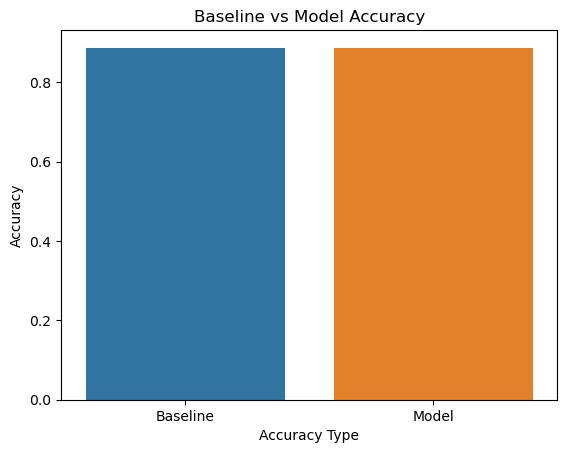

In [73]:
# Plot the accuracy using seaborn
sns.barplot(x=comparison.index, y=comparison['Accuracy'])
plt.title('Baseline vs Model Accuracy')
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.show()


## CRISP-DM PHASE 5: MODEL EVALUATION

In [21]:
### Modeling
# Use of four classifier models (kNN, Decision Trees, Logistic Regression, and SVM)
# Clear identification of evaluation metrics
# Appropriate interpretation of evaluation metrics
# Clear rationale for use of the evaluation metrics
# Appropriate comparison of the four models

#### Comparing each model's accuracy score

In [24]:
# Create a list of model names and models
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

# Create empty lists to store the results
train_scores = []
test_scores = []

# Iterate over each model
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Calculate the accuracy scores for training and test data
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Append the scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create a dataframe to compare the models
results = pd.DataFrame({'Model': model_names, 'Train Accuracy': train_scores, 'Test Accuracy': test_scores})
results = results.set_index('Model')

# Print the dataframe
print(results)

# Determine the best model based on the test accuracy
best_model = results['Test Accuracy'].idxmax()
print(f"Best Model: {best_model}")


                     Train Accuracy  Test Accuracy
Model                                             
Logistic Regression        0.887239       0.887594
KNN                        0.889182       0.877721
Decision Tree              0.917970       0.861212
SVM                        0.887343       0.887513
Best Model: Logistic Regression


#### Conducting Grid Search on Hyperparmeters on Best Model

In [28]:
# Create a list of model names and models
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

# Create a list of parameter grids for each model
param_grids = [
    {'C': [0.001, 0.01, 0.1, 1, 10]},
    {'n_neighbors': [3, 5, 7, 9]},
    {'max_depth': [None, 5, 10, 15]},
    {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
]

# Perform grid search for each model
best_models = []
for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grids[i], cv=5)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)

# Print the best hyperparameters for each model
for i, model_name in enumerate(model_names):
    print(f"Best hyperparameters for {model_name}:")
    print(best_models[i])
    print()


Best hyperparameters for Logistic Regression:
LogisticRegression(C=0.001)

Best hyperparameters for KNN:
KNeighborsClassifier(n_neighbors=9)

Best hyperparameters for Decision Tree:
DecisionTreeClassifier(max_depth=5)

Best hyperparameters for SVM:
SVC(C=0.001, gamma=0.001)



##### Checking to see if this hyperparameter could lead to overfitting

In [32]:
# Create an instance of the LogisticRegression model with 'C' parameter set to 0.001
logreg = LogisticRegression(C=0.001)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Calculate the accuracy scores for training and test data
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

# Print the train and test results
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Determine if the model is overfitted
if train_accuracy > test_accuracy:
    print("The model is overfitted.")
else:
    print("The model is not overfitted.")

    


Train Accuracy: 0.8872394297804447
Test Accuracy: 0.8875940762320952
The model is not overfitted.


Checking the performance metrics for each model and creating a dataframe to show the results

In [35]:
# Create empty lists to store the metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over each model
for model in best_models:
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1-score': f1_scores})
metrics_df = metrics_df.set_index('Model')

# Print the dataframe
print(metrics_df)



c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     Accuracy  Precision    Recall  F1-score
Model                                                       
Logistic Regression  0.887594   0.000000  0.000000  0.000000
KNN                  0.885490   0.405797  0.040317  0.073346
Decision Tree        0.887351   0.451613  0.010079  0.019718
SVM                  0.887594   0.000000  0.000000  0.000000


c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plotting to show the visualization.  The black dotted line indicates best model to use.

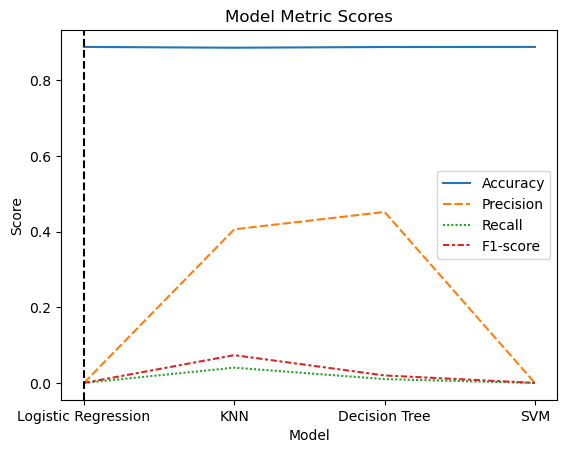

In [38]:
# Plot the metric scores using a line graph
sns.lineplot(data=metrics_df)

# Highlight the best model
best_model = metrics_df.idxmax().values[0]
plt.axvline(x=best_model, color='black', linestyle='--')

# Set the labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Metric Scores')

# Show the plot
plt.show()


## CRISP-DM PHASE 6: DEPLOYMENT

Make predictions based on Logistic Regression Model

In [75]:
# Create an instance of the LogisticRegression model with the best hyperparameters
logreg_best = LogisticRegression(C=0.001)

# Fit the model to the training data
logreg_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_best.predict(X_test)



In [80]:
# Make predictions on the target variable
predictions = logreg_best.predict(df1)

# Count the number of clients who will deposit and who will not deposit
deposit_count = sum(predictions == 1)
no_deposit_count = sum(predictions == 0)

# Calculate the percentage of clients who will deposit and who will not deposit
deposit_percentage = deposit_count / len(predictions) * 100
no_deposit_percentage = no_deposit_count / len(predictions) * 100

# Print the percentages
print(f"Percentage of clients who will deposit: {deposit_percentage:.2f}%")
print(f"Percentage of clients who will not deposit: {no_deposit_percentage:.2f}%")


Percentage of clients who will deposit: 0.00%
Percentage of clients who will not deposit: 100.00%


c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### Conclusion

### Should the bank continue with there current marketing strategy stated above, the success rate of clients depositing will decrease. I recommend the bank use another strategy to increase their client deposit goals.